Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025 <br>

<h1><center>Tarea 1 - Vicente Lavagnino</center></h1>

Profesor: Marcelo Mendoza<br>
Fecha de entrega: 07 de abril 2025



## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es INDIVIDUAL.


**NOMBRE ESTUDIANTE: Vicente Antonio Lavagnino Gatica**

## Librerías

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importa aquí las librerías que vayas a utilizar
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.manifold import TSNE
import umap


## Introducción

El dataset incluye variables cuantitativas y cualitativas sobre tipos de vinos.
A continuación, se presenta una breve descripción de cada atributo:

* type: Tipo de vino

* fixed acidity: Cantidad de ácidos poco volátiles

* volatile acidity: Cantidad de ácidos volátiles

* citric acid: Cantidad de ácido cítrico

* residual sugar: Cantidad de azúcar residual

* chlorides: Cantidad de cloruros

* free sulfur dioxide: Cantidad de dióxido de azufre libre

* total sulfur dioxide: Cantidad total de dióxido de azufre

* density: Densidad del vino

* pH: nivel de acidez o alcalinidad

* sulphates: Cantidad de sulfatos

* alcohol: Cantidad de alcohol

* quality: calidad del vino



## Parte 1: Carga y Preprocesamiento de Datos (20 puntos)

En esta primera parte se debe cargar el dataset y luego describir el comportamiento de algunas variables de interés. Posteriormente, debe realizar el proceso de normalización de los datos.

### 1.1 Carga de Datos (2 puntos)

Cargue el dataset. Indique la cantidad de filas y columnas del conjunto de datos. ¿Existen datos nulos? De ser así, mencione el número de casos por variable y luego elimine todas filas que tengan a lo menos un valor nulo.


RESPUESTA: Vemos que el dataset tiene 6497 filas y 13 columnas. Sin embargo, existen 34 filas con datos nulos. Por lo tanto, eliminamos estas filas.

De esta forma, el dataset queda con 6463 filas y 13 columnas.

In [6]:
# Cargamos el data set
df = pd.read_csv('data.csv')

In [7]:
# Cantidad de filas y columnas
print(f"El conjunto de datos tiene {df.shape} filas y columnas respectivamente.")

El conjunto de datos tiene (6497, 13) filas y columnas respectivamente.


In [8]:
# Existencia de valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())
print("Valores nulos totales:", df.isnull().sum().sum())

# Cantidad de filas con valores nulos
print("Cantidad de filas con valores nulos:", df[df.isnull().any(axis=1)].shape[0])

Valores nulos por columna:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64
Valores nulos totales: 38
Cantidad de filas con valores nulos: 34


In [9]:
# Eliminar filas con valores nulos
df.dropna(inplace=True)
print("Valores nulos después de eliminar filas:", df.isnull().sum())
print("Valores nulos totales:", df.isnull().sum().sum())

# Finalmente vemos como queda el dataframe
print(f"El conjunto de datos limpio {df.shape} filas y columnas respectivamente.")

Valores nulos después de eliminar filas: type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Valores nulos totales: 0
El conjunto de datos limpio (6463, 13) filas y columnas respectivamente.


### 1.2 Análisis descriptivo (12 puntos)

Mediante gráficos y medidas numéricas apropiadas, describa el comportamiento de cada variable del dataset.

Luego, presente gráficos que permitan relacionar las siguientes variables:

* "density" con "fixed acidity"
* "quality" con "alcohol"

Analice todos los resultados obtenidos y comente.

RESPUESTA: Hacemos un gráfico de distribución de cada variable, luego un gráfico para ver la relación entre "density" y "fixed acidity" y otro gráfico para ver la relación entre "quality" y "alcohol". Finalmente, analizamos los resultados obtenidos.

Vemos que la gran mayoría de los datos de cada columna tienen una mayor concentración cerca de la mediana y la media. No obstante, hay algunas variables que presentan gran densidad de datos en los extremos, lo que podría indicar la presencia de outliers o una distribución no normal.

Respecto a la relación entre "density" y "fixed acidity", vemos que la mayoría de los datos se encuentran en el cuadrante inferior izquierdo, si embargo podemos ver que la tendencia es positiva, lo que indica que a medida que aumenta la acidez fija, también aumenta la densidad del vino. Esto podría ser un indicativo de que los vinos con mayor acidez fija tienden a ser más densos. De todas formas podemos ver outliers en el cuadrante derecho inferior.

En cuanto a la relación entre "quality" y "alcohol", incorporamos el filtro de type, vemos que en general los vinos tintos (naranjas) tienden a estar mas concentrados en la zona de la mediana, mientras que los vinos blancos (azules) presentan una mayor dispersión. De todas formas vemos que muchos de los outliers son vinos tintos.

Descripción de la variable type:
count      6463
unique        2
top       white
freq       4870
Name: type, dtype: object


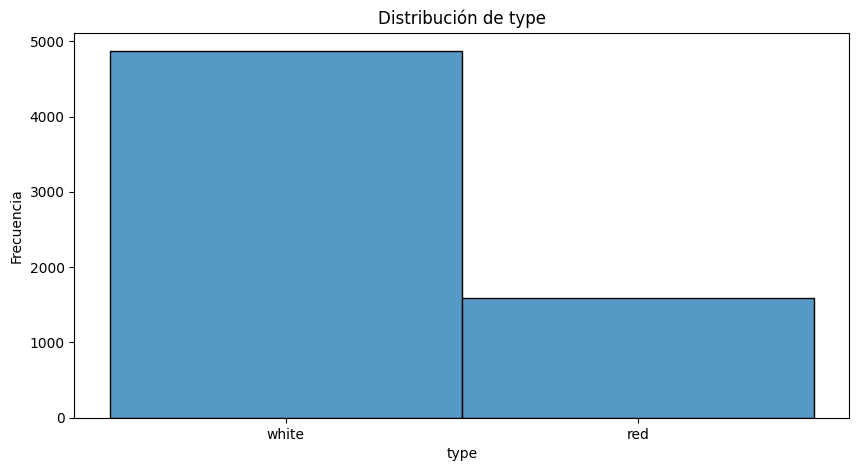

Descripción de la variable fixed acidity:
count    6463.000000
mean        7.217755
std         1.297913
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64


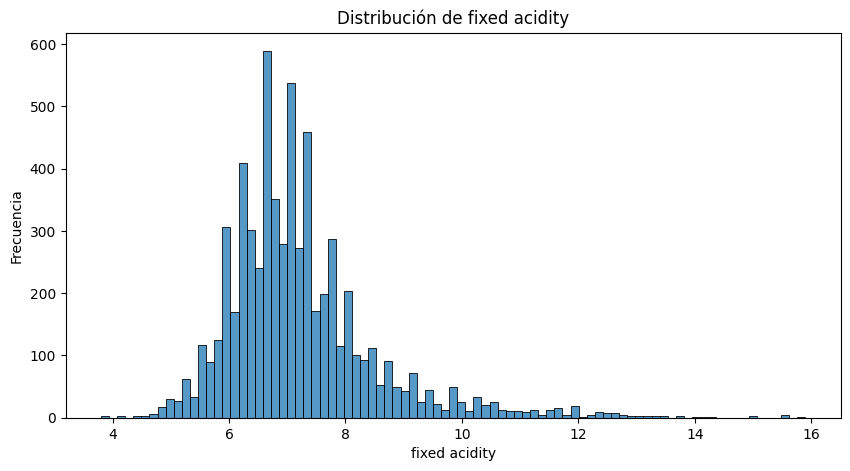

Descripción de la variable volatile acidity:
count    6463.000000
mean        0.339589
std         0.164639
min         0.080000
25%         0.230000
50%         0.290000
75%         0.400000
max         1.580000
Name: volatile acidity, dtype: float64


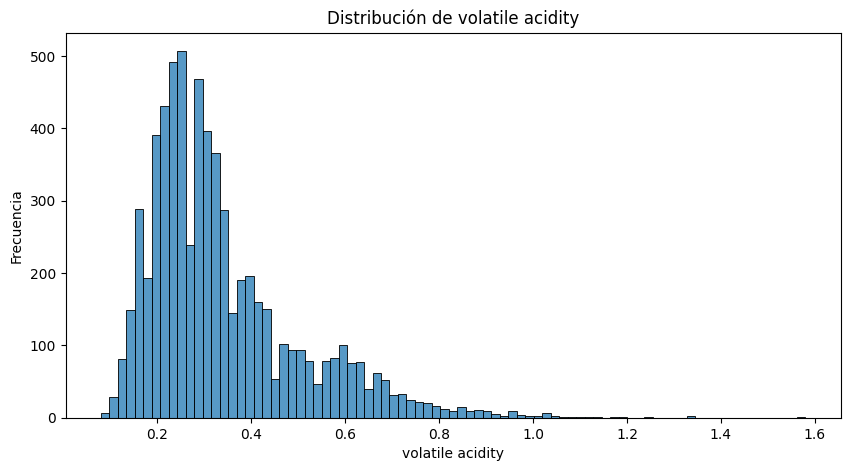

Descripción de la variable citric acid:
count    6463.000000
mean        0.318758
std         0.145252
min         0.000000
25%         0.250000
50%         0.310000
75%         0.390000
max         1.660000
Name: citric acid, dtype: float64


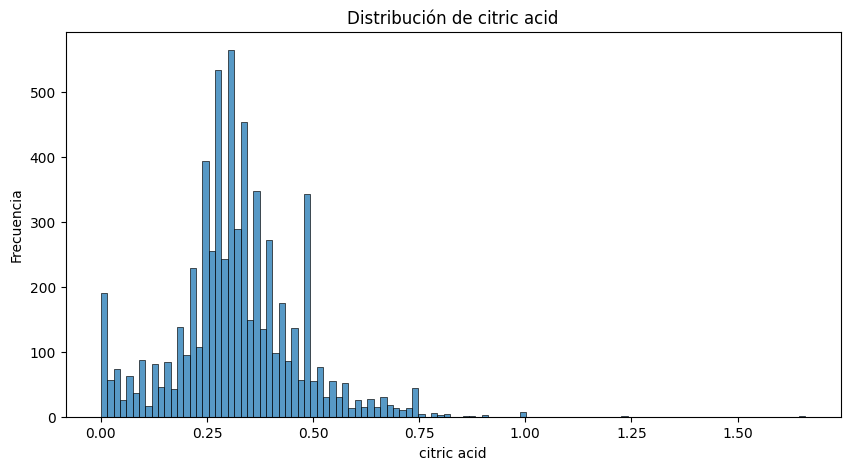

Descripción de la variable residual sugar:
count    6463.000000
mean        5.443958
std         4.756852
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64


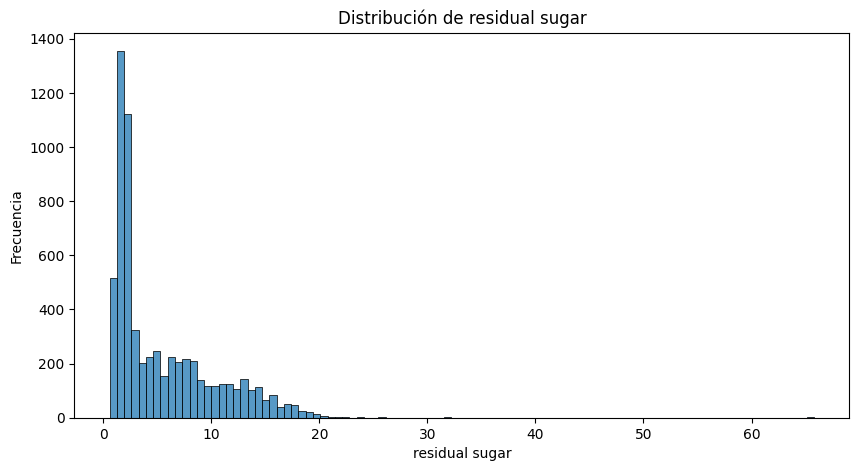

Descripción de la variable chlorides:
count    6463.000000
mean        0.056056
std         0.035076
min         0.009000
25%         0.038000
50%         0.047000
75%         0.065000
max         0.611000
Name: chlorides, dtype: float64


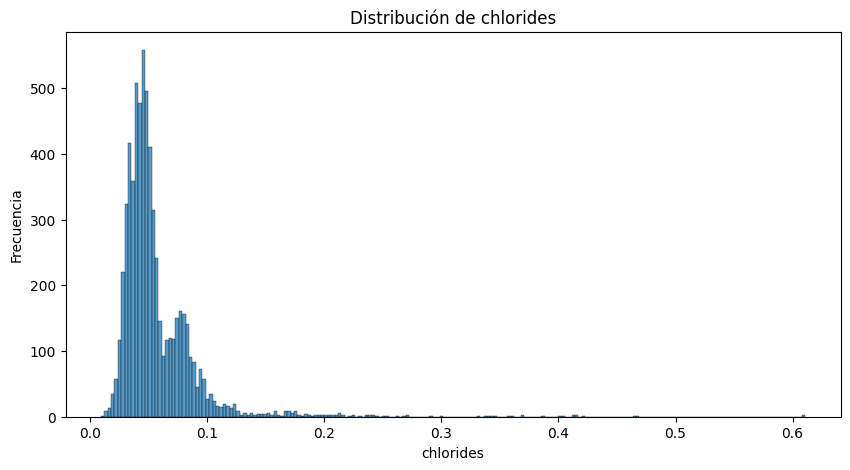

Descripción de la variable free sulfur dioxide:
count    6463.000000
mean       30.516865
std        17.758815
min         1.000000
25%        17.000000
50%        29.000000
75%        41.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64


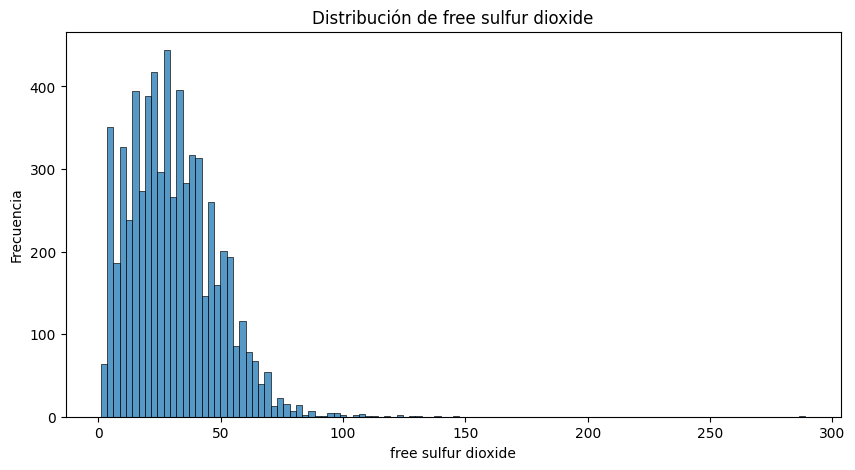

Descripción de la variable total sulfur dioxide:
count    6463.000000
mean      115.694492
std        56.526736
min         6.000000
25%        77.000000
50%       118.000000
75%       156.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


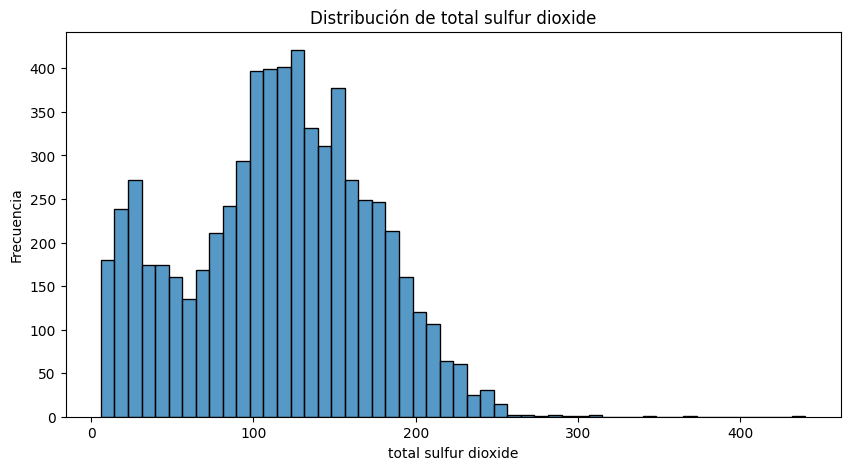

Descripción de la variable density:
count    6463.000000
mean        0.994698
std         0.003001
min         0.987110
25%         0.992330
50%         0.994890
75%         0.997000
max         1.038980
Name: density, dtype: float64


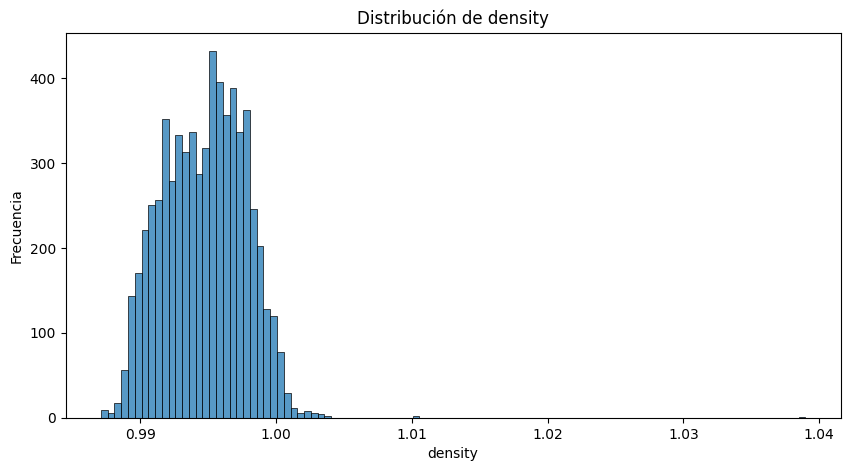

Descripción de la variable pH:
count    6463.000000
mean        3.218332
std         0.160650
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64


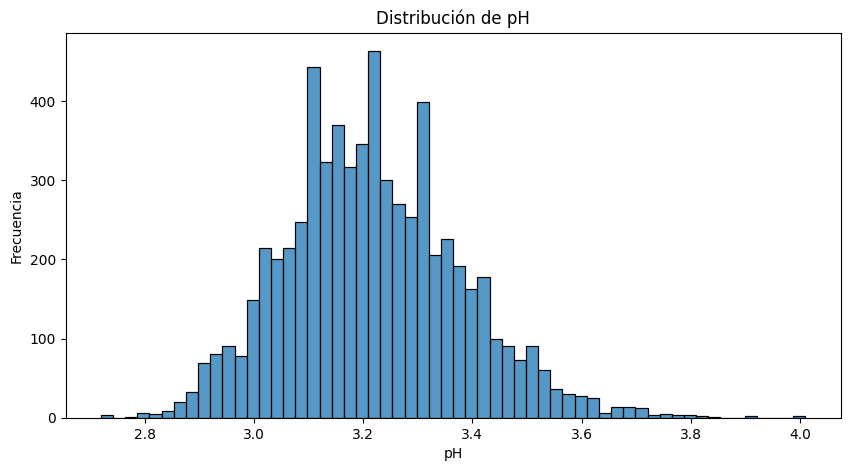

Descripción de la variable sulphates:
count    6463.000000
mean        0.531150
std         0.148913
min         0.220000
25%         0.430000
50%         0.510000
75%         0.600000
max         2.000000
Name: sulphates, dtype: float64


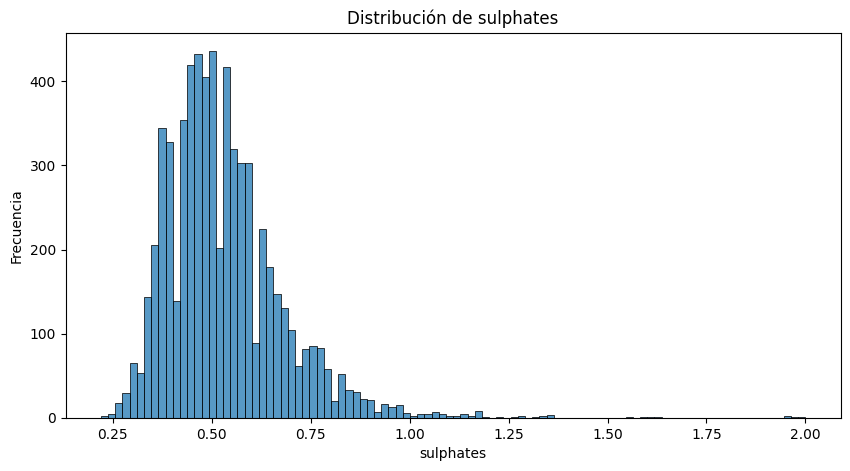

Descripción de la variable alcohol:
count    6463.000000
mean       10.492825
std         1.193128
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64


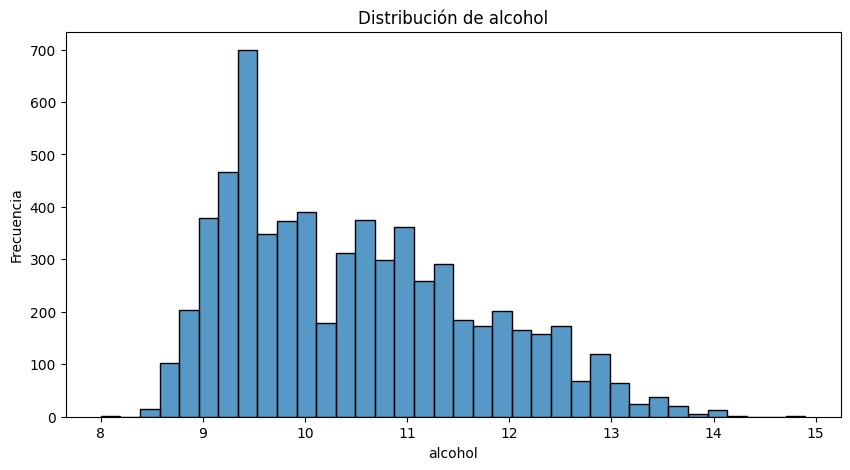

Descripción de la variable quality:
count    6463.000000
mean        5.818505
std         0.873286
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


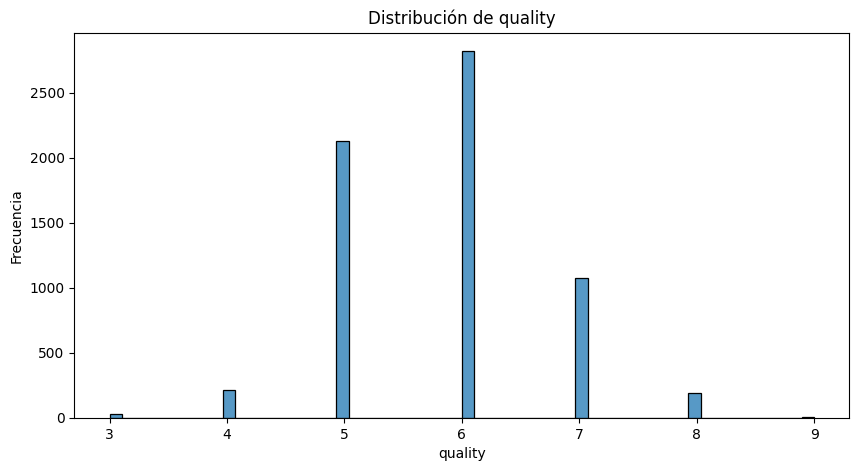

In [10]:
# Hacemos un gráfico de distribución para cada variable
def describe_variable(var):
    print(f"Descripción de la variable {var}:")
    print(df[var].describe())
    plt.figure(figsize=(10, 5))
    sns.histplot(df[var])
    plt.title(f"Distribución de {var}")
    plt.xlabel(var)
    plt.ylabel("Frecuencia")
    plt.show()

for column in df.columns:
    describe_variable(column)

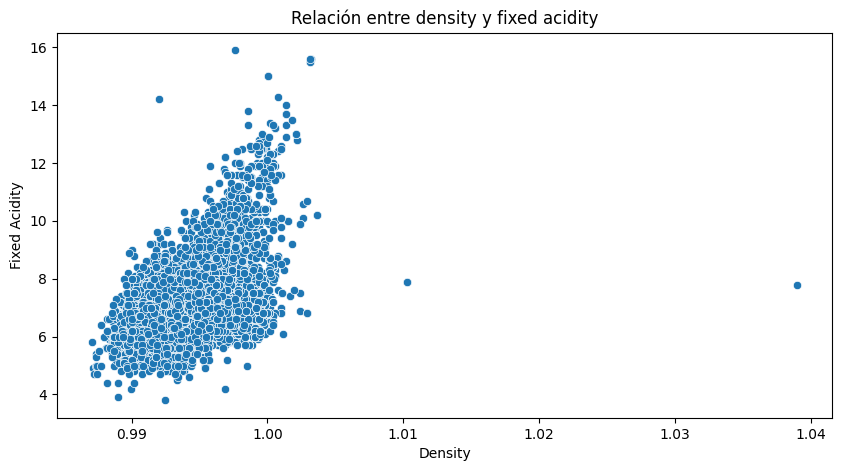

In [11]:
# Grafico para relacionar density con fixed acidity
plt.figure(figsize=(10, 5))
sns.scatterplot(x='density', y='fixed acidity', data=df)
plt.title("Relación entre density y fixed acidity")
plt.xlabel("Density")
plt.ylabel("Fixed Acidity")
plt.show()

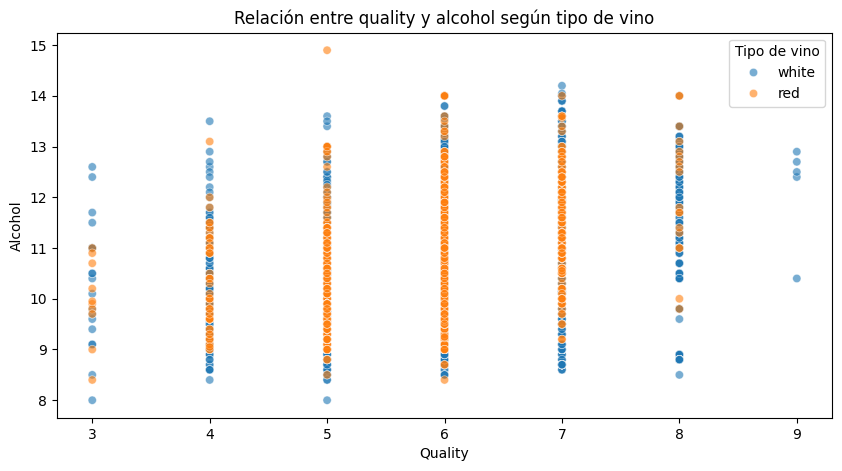

In [12]:
# Grafico para relacionar quality con alcohol
plt.figure(figsize=(10, 5))
sns.scatterplot(x='quality', y='alcohol', hue='type', data=df, alpha=0.6)
plt.title("Relación entre quality y alcohol según tipo de vino")
plt.xlabel("Quality")
plt.ylabel("Alcohol")
plt.legend(title='Tipo de vino')
plt.show()

### 1.3 Normalizar datos (3 puntos)

Realice un proceso de normalización, utilizando MinMaxScaler. No considere las variables quality y type.

Explique por qué es útil realizar esta normalización.

RESPUESTA: Ahora aplicaremos normalización a las variables del dataset, excluyendo las variables "quality" y "type". La normalización es de gran ayuda ya que permite que todas las variables tengan la misma escala, ya que de lo contrario las variables con mayor rango podrían influir más en el modelo que las variables con menor rango. De esta forma, la normalización permite que el modelo aprenda de manera más eficiente y efectiva, ya que todas las variables tienen la misma importancia. Además, la normalización puede ayudar a mejorar la convergencia del modelo y reducir el tiempo de entrenamiento.

In [13]:
# Normalización de los datos, sin considerar la variable quality y type
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled = df_scaled.drop(columns=['quality', 'type'])
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled[df_scaled.columns])
print("Datos normalizados:")
print(df_scaled.head())

Datos normalizados:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.264463          0.126667     0.216867        0.308282   0.059801   
1       0.206612          0.146667     0.204819        0.015337   0.066445   
2       0.355372          0.133333     0.240964        0.096626   0.068106   
3       0.280992          0.100000     0.192771        0.121166   0.081395   
4       0.280992          0.100000     0.192771        0.121166   0.081395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.152778              0.377880  0.267785  0.217054   0.129213   
1             0.045139              0.290323  0.132832  0.449612   0.151685   
2             0.100694              0.209677  0.154039  0.418605   0.123596   
3             0.159722              0.414747  0.163678  0.364341   0.101124   
4             0.159722              0.414747  0.163678  0.364341   0.101124   

    alcohol  
0  0.115942  
1  0.217

### 1.4 Correlación (3 puntos)

Construya una matriz de correlación. Identifique las variables que presentan una alta relación lineal (superior a 0.6 o inferior a -0.6).

**Observación**

Para este análisis solo trabaje con las variables normalizadas en el paso anterior.

RESPUESTA: Al aplicar una matriz de correlación podemos ver que las variables que presentan una relacion lineal superior 0.6 e inferior a -0.6 son:

- free sulfur dioxide y total sulfur dioxide (0.72)
- alcohol y density (-0.68)

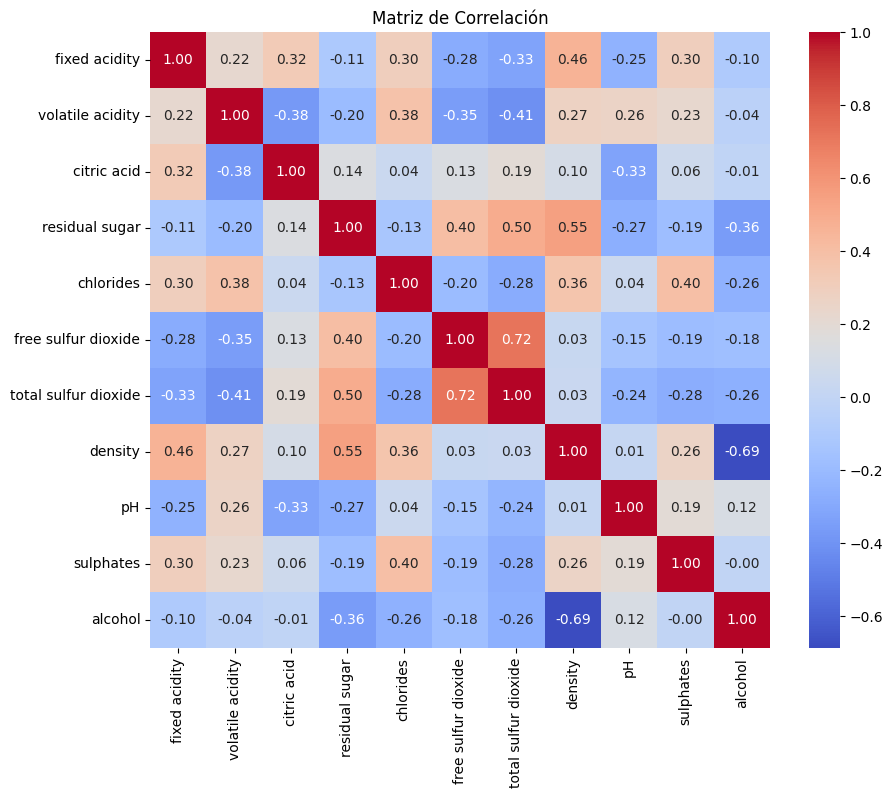

Correlaciones mayores a 0.6:
           Componente 1          Componente 2  Correlation
6   free sulfur dioxide  total sulfur dioxide     0.721476
10              density               alcohol    -0.687432


In [14]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df_scaled.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

# Print de las correlaciones mayores a +-0.6
correlation_threshold = 0.6
correlated_features = correlation_matrix[abs(correlation_matrix) > correlation_threshold].stack().reset_index()
correlated_features.columns = ['Componente 1', 'Componente 2', 'Correlation']
correlated_features = correlated_features[correlated_features['Componente 1'] != correlated_features['Componente 2']]
correlated_features = correlated_features.drop_duplicates(subset=['Correlation'])
print("Correlaciones mayores a 0.6:")
print(correlated_features)

## Parte 2: Reducción de dimensionalidad PCA (10 puntos)

**En esta segunda sección se debe utilizar el resultado 1.3 de la parte 1. Para reducir la dimensionalidad, se debe trabajar con Principal Component Analysis (PCA)**.

### 2.1 Comportamiento de la varianza (5 puntos)

Grafique el comportamiento de la varianza explicada en función del número de componentes. Analice los resultados obtenidos.

RESPUESTA: Se aplicó PCA al conjunto de datos normalizado para analizar la importancia de cada componente principal. Se graficó la varianza explicada individual y la varianza explicada acumulada en función del número de componentes.

El primer gráfico muestra qué tanto aporta cada componente por separado, mientras que el segundo permite ver cuántas componentes son necesarias para explicar un alto porcentaje de la varianza total. En ese sentido, este análisis es fundamental para determinar cuantos componentes son necesarios para explicar la mayor parte de la varianza del dataset sin perder información relevante.

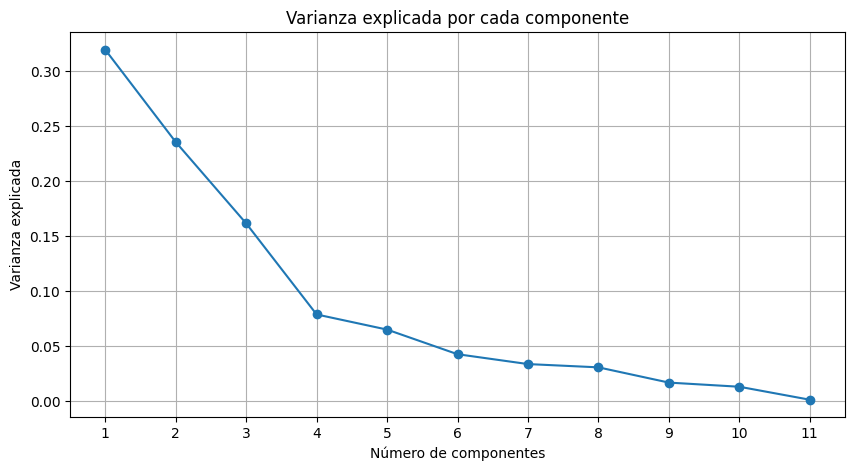

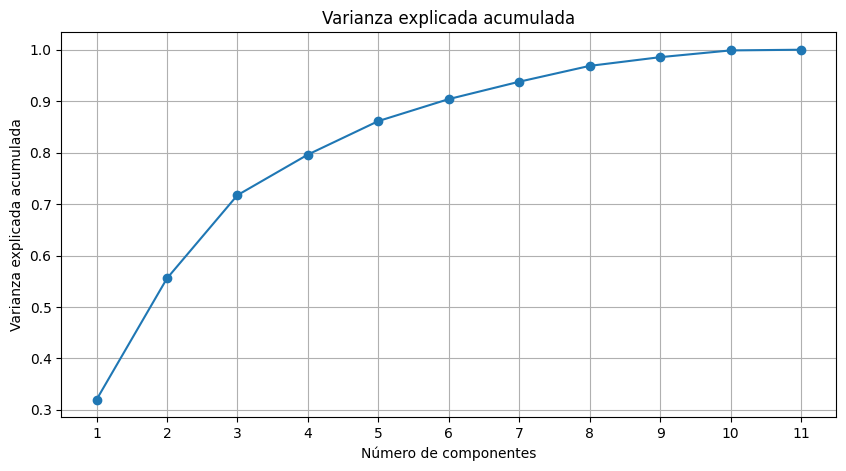

In [15]:
# Graficar comportamiento de la varianza explicada en función del numero de componentes
pca = PCA()
pca.fit(df_scaled)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title("Varianza explicada por cada componente")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

# Graficar comportamiento de la varianza explicada acumulada
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Varianza explicada acumulada")
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()


### 2.2 Retener 90% de la varianza (3 puntos)

Aplique PCA para retener un 90% de la varianza del conjunto de datos normalizado del punto 1.3. ¿Cuál es el número de componentes que se requieren?

RESPUESTA: Al aplicar PCA para retener un 90% de la varianza, se requieren 6 componentes. Esto significa que con 6 componentes se puede explicar el 90% de la varianza del conjunto de datos original, significando que estos son los fundamentales para representar la información del dataset. Esto es útil ya que permite reducir la dimensionalidad del dataset y simplilicar el modelo, sin perder información relevante.

A priori esta información hace sentido y es comparable con la sección anterior, donde vemos que en el gráfico de varianza acumulada, el 90% de la varianza se encuentra en la sexta componente.

In [16]:
# Aplicar pca para retener el 90% de la varianza
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(df_scaled)
print(f"Dimensiones originales: {df_scaled.shape}")
print(f"Dimensiones después de PCA: {X_pca.shape}")

# Cuantos componententes se retuvieron para el 90% de la varianza
n_components = pca.n_components_
print(f"Componentes retenidos para el 90% de la varianza: {n_components}")

Dimensiones originales: (6463, 11)
Dimensiones después de PCA: (6463, 6)
Componentes retenidos para el 90% de la varianza: 6


### 2.3 Reducir dimensionalidad a n=2 (2 puntos)

Considerando el dataset normalizado del punto 1.3, aplique PCA con un número de componentes igual a 2 . Determine la proporción de varianza explicada.

RESPUESTA: Se aplicó PCA reduciendo el conjunto de datos normalizado a 2 componentes principales. Estas dos componentes explican en conjunto aproximadamente un 55.6% de la varianza total del dataset, lo que permite una representación bidimensional relativamente informativa. Aunque no se retiene toda la información, esta proyección facilita la visualización de los datos y puede revelar patrones relevantes, como agrupamientos o tendencias en las variables.

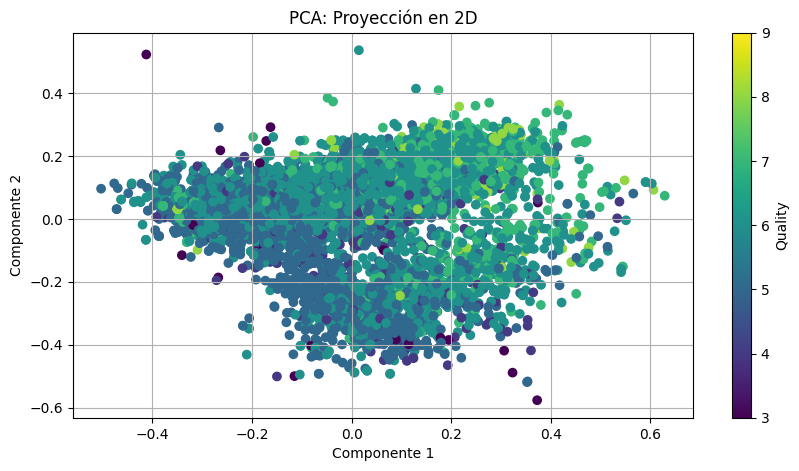

Proporción de varianza explicada por cada componente:
[0.31973948 0.23578097]


In [17]:
# Reducir el dataset a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['quality'], cmap='viridis')
plt.title("PCA: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()

# Proporción de varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Proporción de varianza explicada por cada componente:")
print(explained_variance)

# Si bien no es necesario usar quality para el PCA, lo usamos para ver si hay alguna relación y se seguirá usando para el resto del análisis

## Parte 3: Detección de outliers (10 puntos)

**En esta tercera parte se debe evaluar la existencia de outliers. Para ello, debe trabajar con la matriz obtenida en el punto 2.2 (retiene el 90% de la varianza)**.

### 3.1 Graficar histograma LOF (4 puntos)

Utilizando la técnica **Local Outlier Factor (LOF)**, construya un histograma de puntajes LOF. Considere un número de vecinos igual a 8 y use como métrica la distancia euclidiana. Analice los resultados obtenidos.

RESPUESTA: Como ya sabemos que el número de componentes que retiene el 90% de la varianza es 6, aplicamos la técnica LOF a los datos reducidos a 6 dimensiones. Luego graficamos el histograma de los puntajes LOF.

A partir del análisis del histograma de puntajes LOF, podemos observar la presencia de un pequeño conjunto de observaciones que pueden considerarse outliers, ya que presentan una densidad local significativamente menor a la de sus vecinos. Esto significa que el dataset contiene puntos atípicos que podrían influir en futuros análisis o modelos.

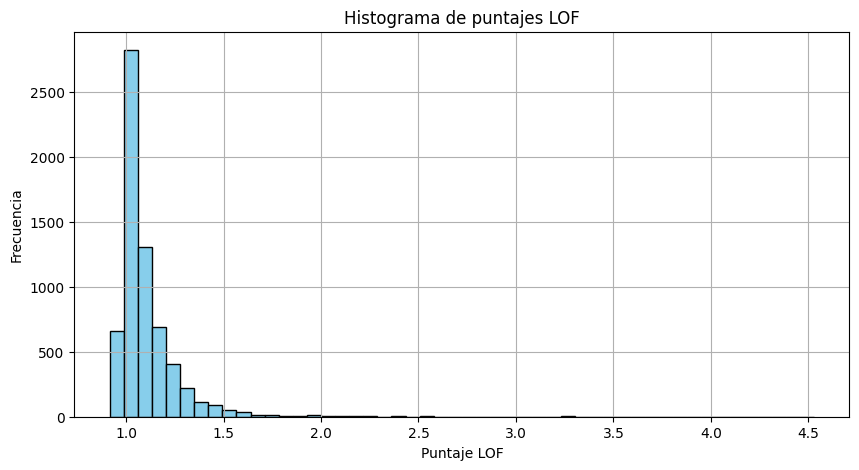

In [18]:
# Usamos información de la sección 2.2
pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(df_scaled)

# Aplicamos Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=8, metric='euclidean')
lof_scores = -lof.fit_predict(X_pca)  # -1 = outlier, 1 = inlier
lof_scores_values = -lof.negative_outlier_factor_

# Graficamos histograma de los puntajes LOF
plt.figure(figsize=(10, 5))
plt.hist(lof_scores_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Histograma de puntajes LOF")
plt.xlabel("Puntaje LOF")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


### 3.2 Identificar datos atípicos (6 puntos)

En base al histograma del punto 3.1, y considerando un umbral de corte igual a -1.5, determine los datos atípicos del dataset. ¿Qué proporción de datos corresponden a outliers?

Luego, elimine los datos atípicos del conjunto de datos evaluado.

RESPUESTA: Con un umbral de corte de -1.5, se identificaron 155 datos atípicos en el dataset, lo que representa aproximadamente el 2.4% del total de los datos. Es por esto que decidimos eliminar estos datos atípicos del dataset, ya que podrían influir negativamente en el análisis posterior.

In [19]:
# Umbral para determinar outliers = -1.5
outlier_threshold = -1.5
outliers = lof.negative_outlier_factor_ < outlier_threshold

num_outliers = np.sum(outliers)
print(f"Cantidad de outliers detectados: {num_outliers}")
print(f"Porcentaje de outliers detectados: {num_outliers / len(df) * 100}%")

# Eliminar outliers
df_sin_outliers = df[~outliers].reset_index(drop=True)

Cantidad de outliers detectados: 155
Porcentaje de outliers detectados: 2.3982670586414976%


## Parte 4: Visualización T-SNE y UMAP (20 puntos)

**En esta sección debe considerar el resultado del punto 3.2. Es decir, el conjunto de datos que no contiene datos atípicos.**

### 4.1 T-SNE (6 puntos)

Describa las principales características del modelo T-SNE.

Ajuste un modelo de 2 componentes mediante T-SNE. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. ¿Reconoce algún patrón?


RESPUESTA: Las principales características del modelo T-SNE son
- Es una técnica de reducción de dimensionalidad no lineal diseñada para visualizar datos de alta dimensión en un espacio de menor dimensión (generalmente 2D o 3D).
- Preserva la estructura local de los datos, lo que significa que los puntos cercanos en el espacio original permanecerán cercanos en el espacio reducido.

En cuanto a los hiperparámetros, se eligieron debido a la documentación de TSNE (https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html):
- n_components=2: Se eligió 2 componentes para facilitar la visualización en un gráfico bidimensional.
- perplexity=50: Se probó con distintos valores y se eligió 30 como un valor intermedio que permite capturar la estructura local de los datos sin perder demasiada información global.
- random_state=42: Se estableció una semilla para garantizar la reproducibilidad de los resultados.
- max_iter=2000: Se eligió un número de iteraciones suficientemente alto para permitir que el algoritmo converja a una solución estable.
- metric='euclidean': Se utilizó la distancia euclidiana como métrica para calcular las distancias entre puntos.
- learning_rate=200: Se eligió un valor de tasa de aprendizaje que permite una convergencia más rápida y estable.

- Previamente se aplicó perplexity = 1 y se observó que la visualización resultante no capturaba adecuadamente la estructura de los datos, luego se probó con 50 donde podemos ver que la visualización es más clara y se pueden observar patrones en los datos, sin embargo no es considerablemente mejor que 30 por lo que dejamos el valor por defecto.

En el gráfico resultante, se puede ver que no existeh agrupamientos claros entre los tipos de vino, lo que sugiere que los datos no están claramente separados en función de la calidad o el tipo de vino. Sin embargo, se pueden observar algunas agrupaciones locales que podrían indicar la presencia de subgrupos dentro del dataset.

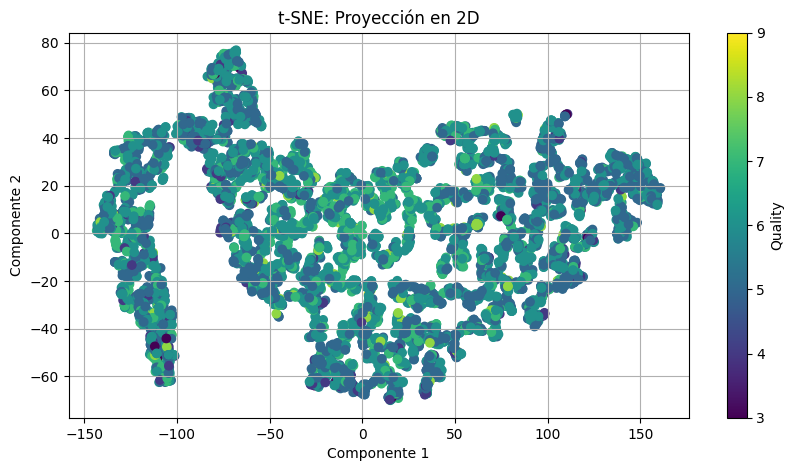

In [20]:
# TSNE con df_sin_outliers
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=2000, metric='euclidean', learning_rate=200)
X_tsne = tsne.fit_transform(df_sin_outliers.drop(columns=['quality', 'type']))
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_sin_outliers['quality'], cmap='viridis')
plt.title("t-SNE: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()


### 4.2 UMAP (6 puntos)

Describa las principales características del modelo UMAP.

Ajuste un modelo 2 componentes mediante UMAP. Justifique la elección de hiperparámetros.

Construya un gráfico que refleje los resultados del modelo. Compare con el gráfico obtenido al trabajar con TSNE.

RESPUESTA: Las principales características del modelo UMAP son:
- Es una técnica de reducción de dimensionalidad no lineal que está hecha para la visualización de datos de alta dimensión en un espacio de menor dimensión (generalmente 2D o 3D).
- Preserva tanto la estructura local como la global de los datos, lo que significa que no solo los puntos cercanos en el espacio original permanecerán cercanos en el espacio reducido, sino que también se mantendrá la relación entre puntos lejanos.
- Generalmente es más rápida y escalable que T-SNE, lo que la hace adecuada para conjuntos de datos grandes.

En cuanto a los hiperparámetros, se eligieron debido a la documentación de UMAP (https://umap-learn.readthedocs.io/en/latest/index.html):
- n_components=2: Se eligió 2 componentes para facilitar la visualización en un gráfico bidimensional.
- n_neighbors=8: Se eligió para mantener consistencia con LOF
- min_dist=0.1: Se eligió un valor bajo para permitir que los puntos cercanos se mantengan juntos.
- metric='euclidean': Se utilizó para mantener consistencia con T-SNE y LOF.
- random_state=42: Se estableció una semilla para garantizar la reproducibilidad de los resultados.

Respecto al gráfico podemos ver que UMAP logra una tendencia más clara y asimilable a una curva, en comparación con otros TSNE. Esto sugiere que UMAP es capaz de capturar mejor la estructura global de los datos y resaltar patrones relevantes. Sin embargo, al igual que con T-SNE, no se observan agrupamientos claros entre los tipos de vino, lo que sugiere que los datos no están claramente separados en función de la calidad o el tipo de vino.

/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


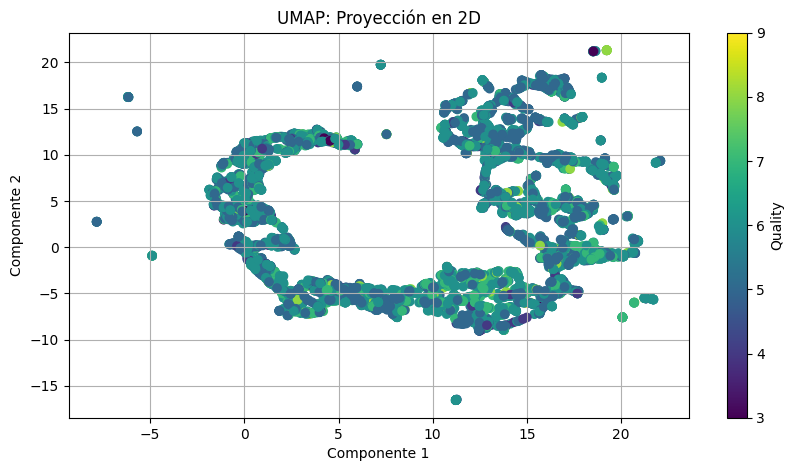

In [23]:
# UMAP
umap_model = umap.UMAP(n_components=2, n_neighbors=8, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = umap_model.fit_transform(df_sin_outliers.drop(columns=['quality', 'type']))
plt.figure(figsize=(10, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df_sin_outliers['quality'], cmap='viridis')
plt.title("UMAP: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()

### 4.3 TSNE y UMAP con labels (8 puntos)

Sobre los gráficos obtenidos en los puntos 4.1 (T-SNE) y 4.2 (UMAP), incorpore la variable "type" del dataset original de tal manera que se pueda observar a qué tipo de vino corresponde cada punto del gráfico. ¿Se observa algún patrón?

Luego, repita el mismo procedimiento, pero trabajando con la variable "quality". Es decir, cada punto en el gráfico debe reflejar la calidad de vino.

Analice los resultados y formule una conclusión.

RESPUESTA:

En primer lugar cabe destacar que para el caso de quality, como ya se había usado anteriormente, se utilizó el mismo caso de las secciones anteriores.

Al mirar los gráficos de t-SNE y UMAP usando colores según el tipo de vino (type), se nota una separación bastante clara entre vinos blancos y tintos. Esto muestra que las variables químicas que usamos para reducir la dimensionalidad logran distinguir bien entre ambos tipos, probablemente porque cosas como el pH, la densidad o el azúcar varían consistentemente entre ellos.

En cambio, cuando coloreamos por la calidad (quality), los puntos aparecen más mezclados, sin grupos tan definidos. Aunque hay zonas donde ciertas calidades se repiten más, no hay una separación tan marcada como en el caso del tipo de vino. Esto podría deberse a que la calidad es una variable más compleja, influida por muchos factores, y por eso es más difícil que se refleje de forma clara en el espacio reducido.

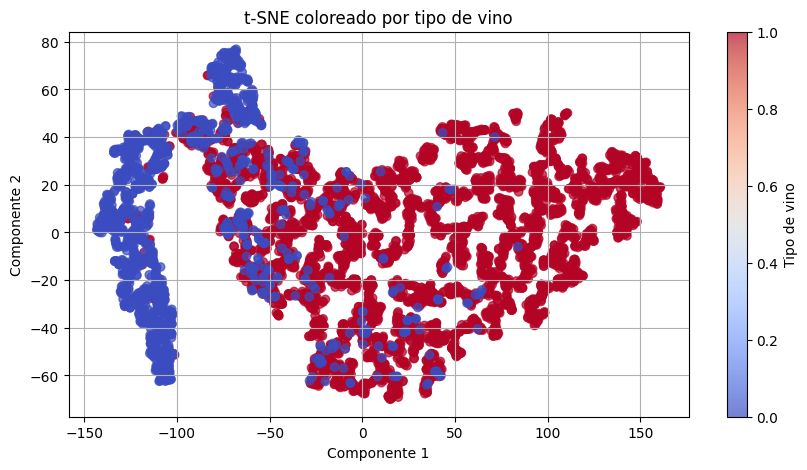

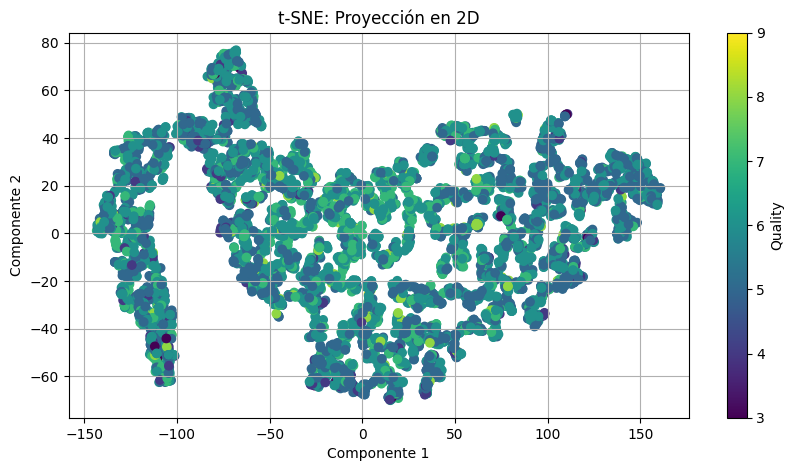

In [28]:
# TSNE

# Con type
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=pd.Categorical(df_sin_outliers['type']).codes, cmap='coolwarm', alpha=0.7)
plt.title("t-SNE coloreado por tipo de vino")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Tipo de vino")
plt.grid(True)
plt.show()

# con quality, en realidad es lo mismo debido a que ya lo habíamos hecho antes
plt.figure(figsize=(10, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_sin_outliers['quality'], cmap='viridis')
plt.title("t-SNE: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()

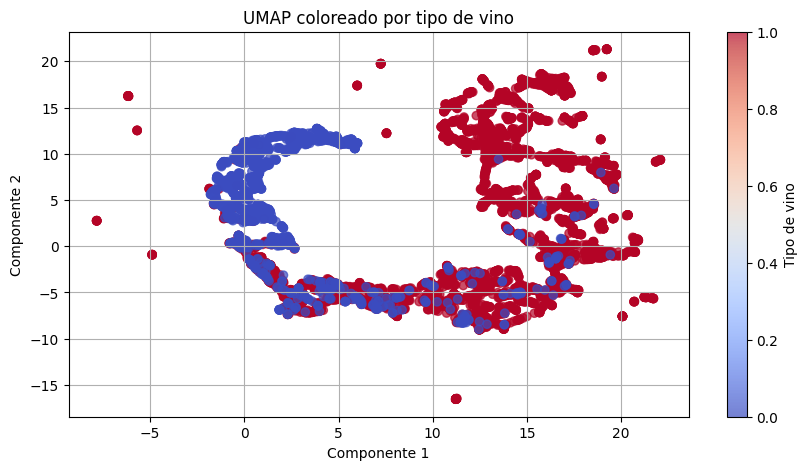

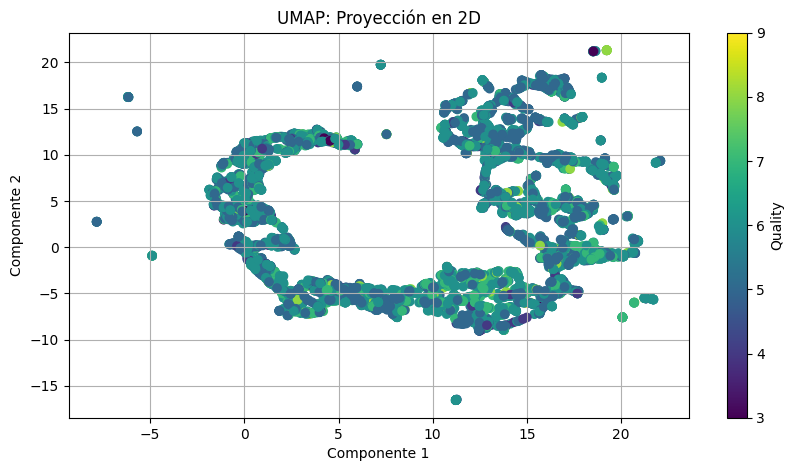

In [29]:
# UMAP

# Con type
plt.figure(figsize=(10, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=pd.Categorical(df_sin_outliers['type']).codes, cmap='coolwarm', alpha=0.7)
plt.title("UMAP coloreado por tipo de vino")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Tipo de vino")
plt.grid(True)
plt.show()

# con quality, en realidad es lo mismo debido a que ya lo habíamos hecho antes
plt.figure(figsize=(10, 5))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df_sin_outliers['quality'], cmap='viridis')
plt.title("UMAP: Proyección en 2D")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label='Quality')
plt.grid()
plt.show()